## Load Data from CSVs

In [3]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [4]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

#reading csv method
def readCSV(fileName):
    with open(fileName, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
enrollments = readCSV('enrollments.csv')
daily_engagement = readCSV('daily_engagement.csv')
project_submissions = readCSV('project_submissions.csv')

daily_engagement[0]
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Fixing Data Types

In [5]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [6]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Problems in the Data

In [8]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for n in daily_engagement:
    n['account_key'] = n['acct']
    del(n['acct'])
daily_engagement[0]['account_key']

u'0'

## Investigating the Data

In [9]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

#def createAccountKeyTable(dataFrame):
    #dataFrame
#for()
#enrollments[0]['account_key']
len(enrollments)

def rows(tableName):
    return len(tableName)

#def uniqueID(tableName):
    #return set()

rangesEnrollments = rows(enrollments)
rangesSubmissions = rows(project_submissions)
rangesEngagement = rows(daily_engagement)

def uniqueId(tableName, ranges):
    n = 0
    IdSet = set()
    for n in range (0, ranges):
        '''if (tableName == daily_engagement):
            temp = tableName[n]['acct']
            IdSet.add(temp)
        else:'''
        temp = tableName[n]['account_key']
        IdSet.add(temp)
    return IdSet

print len(uniqueId(project_submissions, rangesSubmissions))
print len(uniqueId(enrollments, rangesEnrollments))
print rangesEnrollments
print len(uniqueId(daily_engagement, rangesEngagement))

743
1302
1640
1237


## Missing Engagement Records

In [10]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
enrollmentSet = uniqueId(enrollments, rangesEnrollments)
engagementSet = uniqueId(daily_engagement, rangesEngagement)
nonEngaged = set()

for n in range(0, rangesEnrollments):
    if (enrollments[n]['account_key'] not in engagementSet):
        nonEngaged.add(enrollments[n]['account_key'])

print nonEngaged



set([u'1304', u'1129', u'1186', u'1270', u'1222', u'884', u'1120', u'749', u'889', u'707', u'766', u'1125', u'1213', u'996', u'870', u'1069', u'1025', u'1237', u'1079', u'1191', u'1190', u'1145', u'875', u'733', u'799', u'871', u'819', u'654', u'737', u'739', u'914', u'1291', u'1010', u'1148', u'817', u'902', u'997', u'1219', u'981', u'1171', u'717', u'1218', u'1273', u'1238', u'711', u'1241', u'750', u'964', u'1284', u'878', u'841', u'1044', u'1086', u'1155', u'968', u'789', u'664', u'727', u'725', u'926', u'1101', u'803', u'802', u'1063', u'728'])


## Checking for More Problem Records

In [11]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
x = 0
strange = []
for n in range(0, rangesEnrollments):
    if (enrollments[n]['account_key'] in nonEngaged):
        if (enrollments[n]['join_date'] != enrollments[n]['cancel_date']):
            x = x+1
            strange.append(enrollments[n])
print strange[0]
print strange[1]
print strange[2]
print x

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## Tracking Down the Remaining Problems

In [12]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [13]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [14]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments) 
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [15]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

# days_to_cancel == None OR days_to_cancel > 7
# 

paid_students = {}
egSet = set()

for n in non_udacity_enrollments:
    if((n['days_to_cancel']== None) or (n['days_to_cancel']>7)):
        account_key = n['account_key']
        enrollment_date = n['join_date']
        if(account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
            

egSet = paid_students.keys()
print len(paid_students)
 

995


## Getting Data from First Week

In [16]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [17]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def removeTrialAccounts(dataField):
    newData = []
    for data in dataField:
        if data['account_key'] in egSet:
            newData.append(data)
    return newData

paidEnrollments = removeTrialAccounts(non_udacity_enrollments)
paidEngagements = removeTrialAccounts(non_udacity_engagement)
paidSubmissions = removeTrialAccounts(non_udacity_submissions)

paid_engagement_in_first_week = []

print len(paidEnrollments)
print len(paidEngagements)
print len(paidSubmissions)

for n in paidEngagements:
    account_key = n['account_key']
    join_date = paid_students[account_key]
    engagement_date = n['utc_date']
    
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(n)
            
print len(paid_engagement_in_first_week)

                
                


1293
134549
3618
6919


## Exploring Student Engagement

In [18]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

# code to group data by any variable eg. account_key

def groupData(data, key_name):
    data_by_account = defaultdict(list)   #enters in missign values form data
    for n in data:
        key_value = n['account_key']
        data_by_account[key_value].append(n)
    return data_by_account
    

In [19]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

#data is defaultdict(list) passed through the  groupData(data, key_name) function
def getTotalOfDataValue(data, dataField):
    total_data_field = {}
    for account_key, n in data.items():
    #account_key is account key; n is for example engagement_for_student i.e. the relevant data field value in the students data
        total_data = 0
        #total_data is place holder for datafield that we will be totaling eg. total minutes
        for n_record in n:
            #little confusing code, but n_record will loop through the individual tupules in the user's data "n"
            total_data += n_record[dataField]
        total_data_field[account_key] = total_data
    return total_data_field
   
        

In [20]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

def summarizeData(summarized_data):
    total_data = summarized_data.values()
    print 'Mean:', np.mean(total_data)
    print 'Standard deviation:', np.std(total_data)
    print 'Minimum:', np.min(total_data)
    print 'Maximum:', np.max(total_data)
    print '\n'
    

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [21]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
questionableData = []
for n in total_minutes_by_account:
    if n > 10000:
        questionableData.append(n)

print questionableData

[u'619', u'1140', u'669', u'428', u'344', u'0', u'346', u'347', u'340', u'341', u'342', u'343', u'811', u'812', u'348', u'349', u'816', u'918', u'1149', u'719', u'718', u'715', u'426', u'713', u'712', u'710', u'661', u'129', u'660', u'422', u'1060', u'1062', u'1067', u'1066', u'671', u'427', u'298', u'299', u'296', u'297', u'294', u'295', u'292', u'293', u'290', u'291', u'591', u'590', u'593', u'592', u'595', u'594', u'597', u'596', u'195', u'194', u'197', u'196', u'191', u'190', u'193', u'192', u'270', u'271', u'272', u'273', u'274', u'275', u'276', u'277', u'278', u'279', u'497', u'524', u'525', u'526', u'527', u'520', u'1019', u'522', u'523', u'1014', u'1015', u'528', u'529', u'1013', u'1235', u'449', u'391', u'1231', u'443', u'442', u'441', u'440', u'447', u'446', u'445', u'444', u'47', u'108', u'109', u'102', u'103', u'100', u'101', u'106', u'107', u'104', u'105', u'39', u'38', u'906', u'905', u'33', u'32', u'31', u'30', u'37', u'36', u'35', u'34', u'641', u'640', u'1243', u'642',

## Lessons Completed in First Week

In [22]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

'''total_lessons_completed_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record["lessons_completed"]
        total_lessons_completed_by_account[account_key] = total_lessons

total_lessons = total_lessons_completed_by_account.values()
print 'Mean:', np.mean(total_lessons)
print 'Standard deviation:', np.std(total_lessons)
print 'Minimum:', np.min(total_lessons)
print 'Maximum:', np.max(total_lessons) 
'''

key_name = 'account_key'
total_lessons_completed_by_account = groupData(paid_engagement_in_first_week, 'account_key')
totaled_lessons = getTotalOfDataValue(total_lessons_completed_by_account, "lessons_completed")
summarizeData(totaled_lessons)





Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36




## Number of Visits in First Week

In [23]:
######################################
#                 10                 #
######################################



## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

def getTotalDaysVisited(data):    
    for account_key, n in data.items():
        for n_record in n:
            if n_record['num_courses_visited'] == 0:
                n_record['has_visited'] = 0
            else:
                n_record['has_visited'] = 1

    total_days_visited = {}
    
    for account_key, n in data.items():
        total_days = 0
        for n_record in n:
            total_days += n_record['has_visited']
            total_days_visited[account_key] = total_days
    return total_days_visited

#summarizeData(getTotalDaysVisited())

    

## Splitting out Passing Students

In [24]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']



passing_paid_engagement = set()

for n in paidSubmissions:
    project = n['lesson_key']
    rating = n['assigned_rating']
    
    if ((project in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION')):
        passing_paid_engagement.add(n['account_key'])

len(passing_paid_engagement)

passing_engagement = []
non_passing_engagement = []

for n in paid_engagement_in_first_week:
    if n['account_key'] in passing_paid_engagement:
        passing_engagement.append(n)
    else:
        non_passing_engagement.append(n)
print len(passing_engagement)
print len(non_passing_engagement)

'''
for n in paid_engagement

passing_engagement = set()
non_passing_engagement = set()

for account_key, n in total_projects_by_account.items():
    for n_record in n:
        if n_record['lesson_key'] == '746169184' or n_record['lesson_key']== '3176718735':
            if n_record['assigned_rating'] == 'PASSED' or n_record['assigned_rating'] == 'DISTINCTION':
                account_val = n_record['account_key']
                passing_engagement.add(account_val)
                #non_passing_engagement = [x for x in non_passing_engagement if x!=account_val]
            if n_record['assigned_rating'] == 'INCOMPLETE':
                account_val = n_record['account_key']
                non_passing_engagement.add(account_val)
for x in passing_engagement:
    if x in non_passing_engagement:
        non_passing_engagement.remove(x)
        
print len(passing_engagement)
print len(non_passing_engagement)'''

4527
2392


"\nfor n in paid_engagement\n\npassing_engagement = set()\nnon_passing_engagement = set()\n\nfor account_key, n in total_projects_by_account.items():\n    for n_record in n:\n        if n_record['lesson_key'] == '746169184' or n_record['lesson_key']== '3176718735':\n            if n_record['assigned_rating'] == 'PASSED' or n_record['assigned_rating'] == 'DISTINCTION':\n                account_val = n_record['account_key']\n                passing_engagement.add(account_val)\n                #non_passing_engagement = [x for x in non_passing_engagement if x!=account_val]\n            if n_record['assigned_rating'] == 'INCOMPLETE':\n                account_val = n_record['account_key']\n                non_passing_engagement.add(account_val)\nfor x in passing_engagement:\n    if x in non_passing_engagement:\n        non_passing_engagement.remove(x)\n        \nprint len(passing_engagement)\nprint len(non_passing_engagement)"

## Comparing the Two Student Groups

In [25]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited)

passingGroup = groupData(passing_engagement, account_key)
failingGroup = groupData(non_passing_engagement, account_key)

passingTotalMinutes = getTotalOfDataValue(passingGroup, "total_minutes_visited")
failingTotalMinutes = getTotalOfDataValue(failingGroup, 'total_minutes_visited')

passingTotalLessons = getTotalOfDataValue(passingGroup, "lessons_completed")
failingTotalLessons = getTotalOfDataValue(failingGroup, "lessons_completed")

print "Passing students total minutes: \n"
summarizeData(passingTotalMinutes)
print "Failing students toatl minutes: \n"
summarizeData(failingTotalMinutes)
print "Passing students total lessons completed \n"
summarizeData(passingTotalLessons)
print "Failing students total lessons: \n"
summarizeData(failingTotalLessons)

passingTotalcourses = getTotalOfDataValue(passingGroup, "num_courses_visited")
failingTotalcourses = getTotalOfDataValue(failingGroup, "num_courses_visited")

print "Passing students total courses visited \n"
summarizeData(passingTotalcourses)
print "Failing students total courses visited: \n"
summarizeData(failingTotalcourses)

print "Passing students total courses visited \n"
summarizeData(getTotalDaysVisited(passingGroup))
print "Failing students total courses visited: \n"
summarizeData(getTotalDaysVisited(failingGroup))


Passing students total minutes: 

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


Failing students toatl minutes: 

Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


Passing students total lessons completed 

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


Failing students total lessons: 

Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


Passing students total courses visited 

Mean: 4.72642967543
Standard deviation: 3.7002397793
Minimum: 0
Maximum: 25


Failing students total courses visited: 

Mean: 2.58908045977
Standard deviation: 2.90670969025
Minimum: 0
Maximum: 18


Passing students total courses visited 

Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


Failing students total courses visited: 

Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7




## Making Histograms

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([ 97.,  90.,  56.,  41.,  15.,  24.,  17.,   8.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

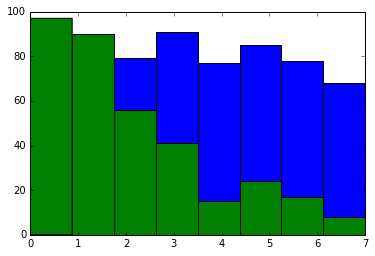

In [26]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%pylab inline
import matplotlib.pyplot as plt
#plt.hist(passingTotalMinutes.values())
#plt.hist(failingTotalMinutes.values())
#plt.hist(passingTotalLessons.values())
#plt.hist(failingTotalLessons.values())
#plt.hist(passingTotalcourses.values())
#plt.hist(failingTotalcourses.values())
plt.hist(getTotalDaysVisited(passingGroup).values(),8)
plt.hist(getTotalDaysVisited(failingGroup).values(),8)

## Improving Plots and Sharing Findings

C:\Users\Rikesh\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


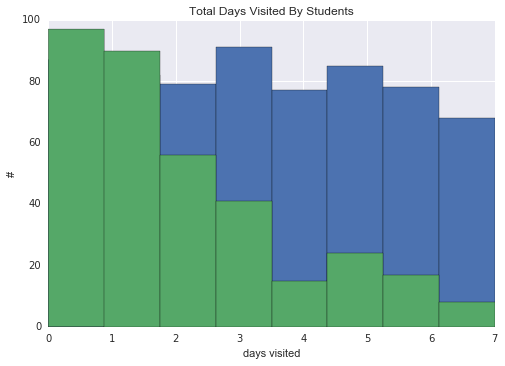

In [27]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plt.hist(getTotalDaysVisited(passingGroup).values(),8)
plt.hist(getTotalDaysVisited(failingGroup).values(),8)
plt.xlabel("days visited")
plt.ylabel("#")
plt.title("Total Days Visited By Students")


